In [29]:
import pandas as pd

In [30]:
house_df = pd.read_csv(r'..\Datasets\HousingData.csv')
house_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [31]:
house_df.shape

(506, 14)

In [32]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [33]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### MEDV is the dependant variable

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

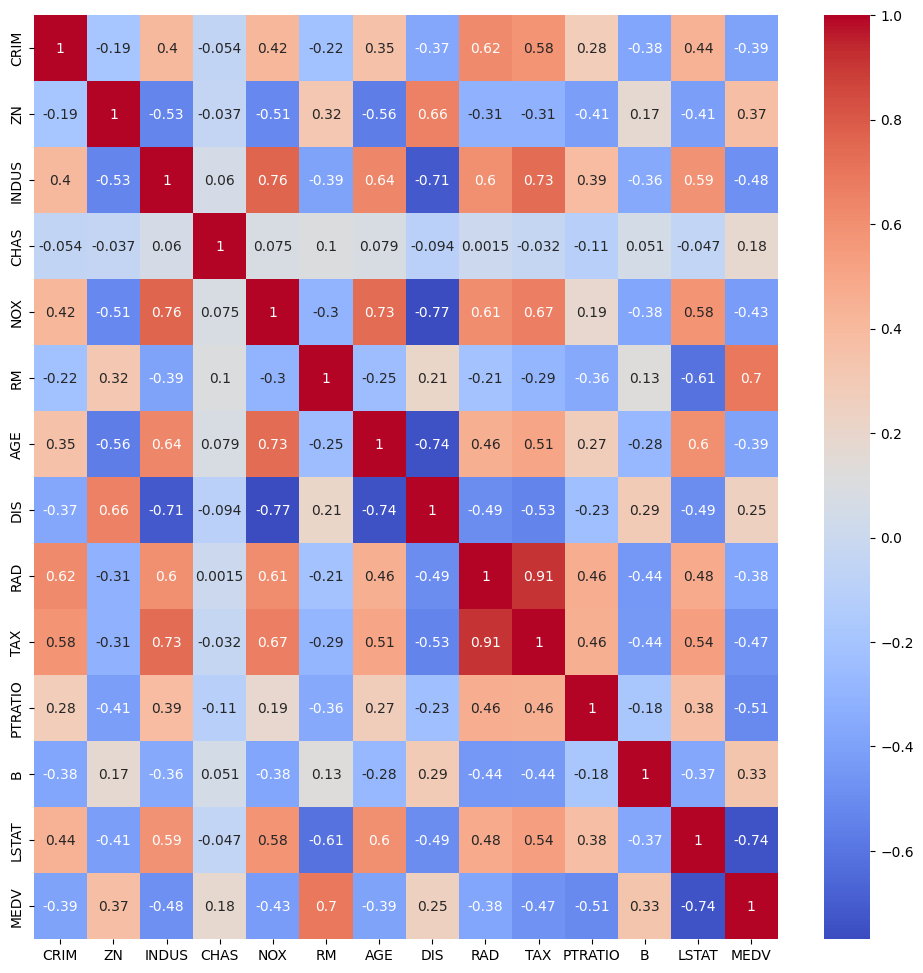

In [35]:
plt.figure(figsize=(12, 12))
sns.heatmap(data = house_df.corr(), cmap = 'coolwarm', annot = True)
plt.show()

#### The dependant variables we choose may affect the accuracy of the model

In [36]:
#X = house_df[['ZN', 'RM', 'TAX', 'PTRATIO', 'LSTAT']]
X = house_df[['RM', 'PTRATIO', 'LSTAT']]
y = house_df['MEDV']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=50)
#ensure that each time you run the code, the train and test splits will be the same

In [39]:
X_train.shape

(404, 3)

In [40]:
y_train.shape

(404,)

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 449 to 176
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       404 non-null    float64
 1   PTRATIO  404 non-null    float64
 2   LSTAT    389 non-null    float64
dtypes: float64(3)
memory usage: 12.6 KB


In [42]:
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy = 'mean')
#X_array = imputer.fit_transform(X_train)
#X_train = pd.DataFrame(X_array)

X_train.fillna(X_train.median(), inplace=True)

#X_train['ZN'] = X_train['ZN'].fillna(X_train['ZN'].median())

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 449 to 176
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       404 non-null    float64
 1   PTRATIO  404 non-null    float64
 2   LSTAT    404 non-null    float64
dtypes: float64(3)
memory usage: 12.6 KB


In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [45]:
X_test = X_test.fillna(X_test.median())

In [46]:
print(X_test.head(3))

        RM  PTRATIO  LSTAT
365  3.561     20.2   7.12
313  6.266     18.4   7.90
461  6.376     20.2  14.65


In [47]:
print(y_test.head(3))

365    27.5
313    21.6
461    17.7
Name: MEDV, dtype: float64


In [48]:
#y_pred = lr.predict([[0.0, 3.561, 666, 20.2,7.12]])
y_pred = lr.predict([[3.561, 20.2,7.12]])
print(y_pred)

[9.95204765]


d:\Software\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Regression Model need to be given with feature names as it is a supervised learning model

In [49]:
#arr = pd.DataFrame([{'ZN':0.0, 'RM':6.266, 'TAX':304, 'PTRATIO':18.4, 'LSTAT':7.9}])
arr = pd.DataFrame([{'RM':6.266, 'PTRATIO':18.4, 'LSTAT':7.9}])
y_pred = lr.predict(arr)
print(y_pred)

[24.93522876]


In [50]:
y_pred = lr.predict(X_test)

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
MSE = mean_squared_error(y_test, y_pred)
print(MSE)

32.20653083159651


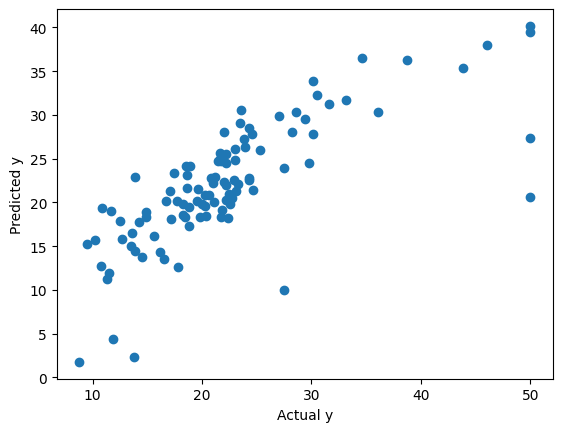

In [53]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show()

In [54]:
import pickle as pkl

In [55]:
with open('HouseModel.pkl', 'wb') as model_file:
    pkl.dump(lr, model_file)

In [56]:
with open('HouseModel.pkl', 'rb') as model_file:
    model = pkl.load(model_file)

arr2 = pd.DataFrame([{'RM': 6.376,'PTRATIO': 20.2, 'LSTAT': 14.6}])
result = model.predict(arr2)
print(result)

[20.16950369]
